# Performance comparison and Conclusion

In [2]:
import numpy as np
import pandas as pd
import pickle
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [3]:
train = pd.read_csv("https://github.com/xiaozhang-github/DST-Assessment-4/raw/main/Data/CICIDS2017_Wed_train.zip",header=None)
test = pd.read_csv("https://github.com/xiaozhang-github/DST-Assessment-4/raw/main/Data/CICIDS2017_Wed_test.zip",header=None)
train_x = train.drop([78],axis=1)
train_y = train[78]
test_x = test.drop([78],axis=1)
test_y = test[78]

In [4]:
pred_ffnn = pickle.load(open('pred_test_y.p','rb'))
pred_ae = pickle.load(open('predtest.p','rb'))

## FFNN and Auto_encoder

In [5]:
len(pred_ae)

207422

In [6]:
len(pred_ffnn)

207422

In [7]:
len(test_y)

207422

In [8]:
print("classification_report of ffnn:")
print(classification_report(test_y, pred_ffnn,
                           target_names=['BENIGN', 'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'Heartbleed']))
print("classification_report of ae:")
print(classification_report(test_y, pred_ae,
                           target_names=['BENIGN', 'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'Heartbleed']))

classification_report of ffnn:
                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00    131594
        DoS Hulk       1.00      1.00      1.00     69339
   DoS GoldenEye       1.00      0.99      0.99      3069
   DoS slowloris       0.99      0.99      0.99      1721
DoS Slowhttptest       0.97      0.99      0.98      1696
      Heartbleed       1.00      0.67      0.80         3

        accuracy                           1.00    207422
       macro avg       0.99      0.94      0.96    207422
    weighted avg       1.00      1.00      1.00    207422

classification_report of ae:


D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          BENIGN       0.99      0.99      0.99    131594
        DoS Hulk       0.97      0.99      0.98     69339
   DoS GoldenEye       0.95      0.90      0.92      3069
   DoS slowloris       0.92      0.88      0.90      1721
DoS Slowhttptest       0.90      0.89      0.90      1696
      Heartbleed       0.00      0.00      0.00         3

        accuracy                           0.98    207422
       macro avg       0.79      0.77      0.78    207422
    weighted avg       0.98      0.98      0.98    207422



We can see that the performance of the feedforward neural network is better than that of the autoencoder on the benign traffic and various attacks.

This could be because feedforward neural networks are better suited for classification problems [1].

Or maybe the hyperparameter tuning of autoencoder approach is more flawed. After all, the autoencoder method is more complex. It is first an unsupervised algorithm for dimensionality reduction, then is added to the neural network for classificationn. Both of these processes may be problematic.

## Machine learning and Deep learning

In past assessments, we used a lot of traditional machine learning methods, such as regression and decision trees. Random forest. Naive Bayes and more. The deep learning we are studying now is a special kind of machine learning, which requires higher computing power and data scale, and the hyperparameter tuning is a very challenging work.

### Decision Tree

In [9]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(train_x, train_y)
pred_tree = clf_tree.predict(test_x)

### Logistic regression

In [10]:
clf_log = SGDClassifier(loss='log')
clf_log.fit(train_x, train_y)
pred_log = clf_log.predict(test_x)

### Visualization

In [18]:
def cal_APRF(pre,test):
    result = []
    ACC = round(100*(accuracy_score(pre, test)),3)
    result.append(ACC)
    # Precision
    P = round(100*(precision_score(pre, test, average="weighted")),3)
    result.append(P)
    # Recall 
    R = round(100*(recall_score(pre, test, average="weighted")),3)
    result.append(R)
    # F1-Score
    F = round(100*(f1_score(pre, test, average="weighted")),3)
    result.append(F)
    return result

score1 = cal_APRF(pred_log,test_y)
score2 = cal_APRF(pred_tree,test_y)
score3 = cal_APRF(pred_ffnn,test_y)
score4 = cal_APRF(pred_ae,test_y)

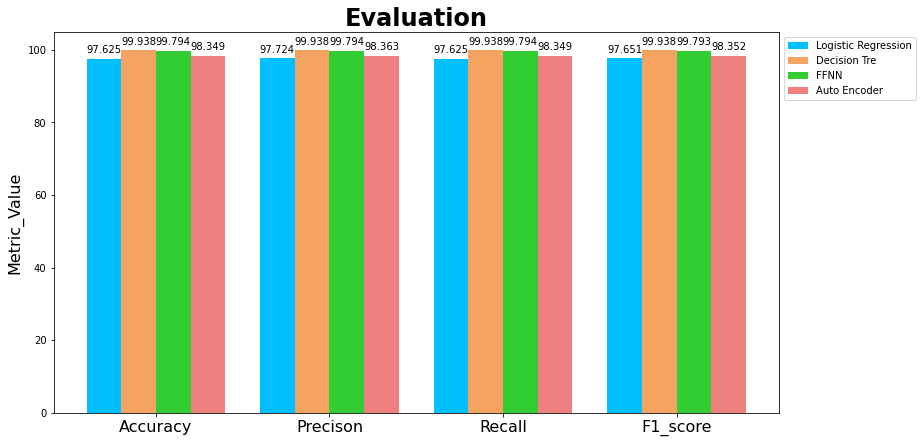

In [21]:
def draw_APRF(score1,score2,score3,score4):
    plt.figure(figsize=(13,7))
    metric = ('Accuracy', 'Precison', 'Recall', 'F1_score', )
    bar_width = 0.2  
    index_nb = np.arange(len(metric))
    index_log = index_nb + bar_width  
    index_tree = index_log + bar_width  
    index_forest = index_tree + bar_width

    p1 = plt.bar(index_nb, height=score1, width=bar_width, color='deepskyblue',label='Logistic Regression')
    p2 = plt.bar(index_log, height=score2, width=bar_width, color='sandybrown',label='Decision Tre')
    p3 = plt.bar(index_tree, height=score3, width=bar_width, color='limegreen',label='FFNN')
    p4 = plt.bar(index_forest, height=score4, width=bar_width, color='lightcoral',label='Auto Encoder')

    #Mark the value on the graph
    for p in p1:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p2:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p3:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")
    for p in p4:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height+1, str(height), ha="center", va="bottom")

    plt.legend(bbox_to_anchor=(1, 1))  
    plt.xticks(index_log + bar_width/2, metric, fontsize=16)  
    plt.ylabel('Metric_Value', fontsize=16)  
    plt.title('Evaluation', fontsize=24, fontweight= 'black')  
    plt.show()
    
draw_APRF(score1,score2,score3,score4)

Surprisingly, a simple decision tree model performed better than FFNN. There are two possible reasons:

First, deep learning is more dependent on data. If the data scale is larger, FFNN performance may exceed decision tree.

Second, there is still room for improvement of FFNN model's hyperparameter optimization technology, such as Sklearn's grid search and Kerastuner's hyperparameter optimization.

D:\anaconda\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


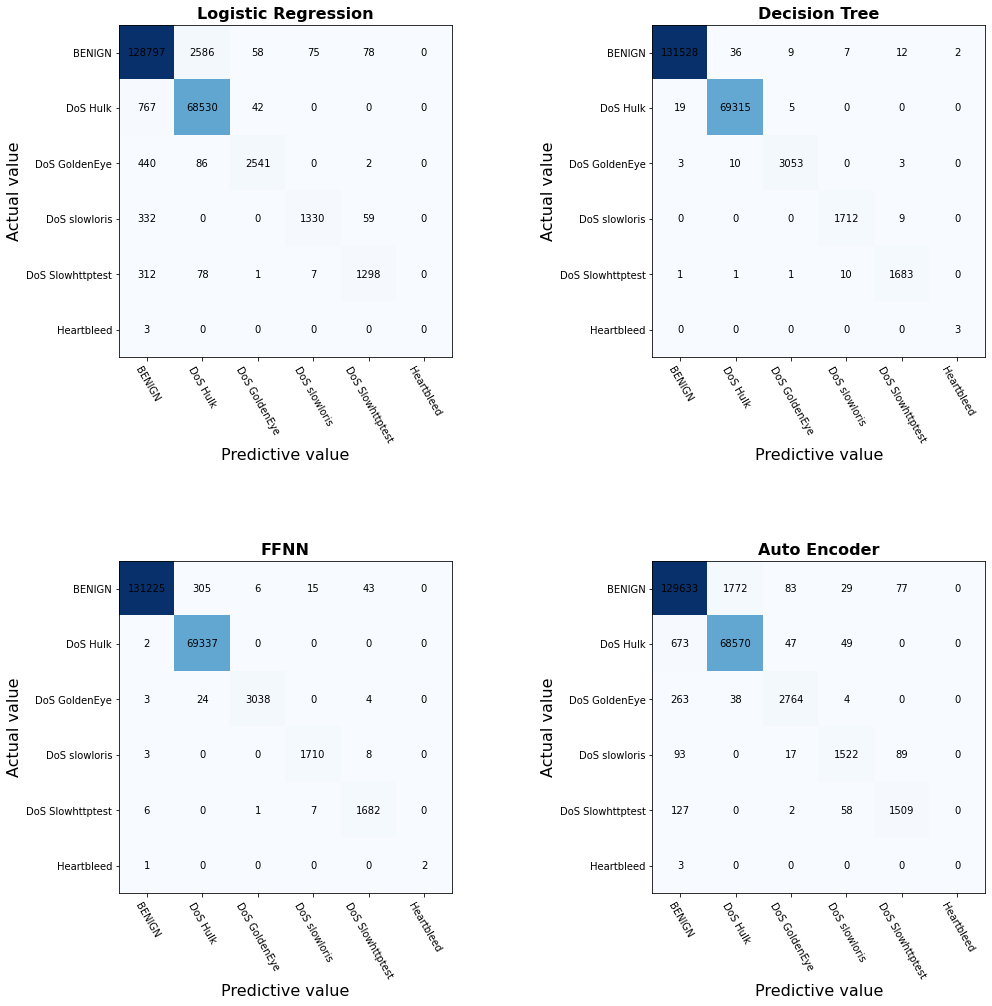

In [28]:
def draw_cm(matrix, matrix2, matrix3, matrix4):
    plt.figure(figsize=(16,16))
    label=np.array(['BENIGN', 'DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'Heartbleed'])
    cm=np.array([matrix, matrix2, matrix3, matrix4])
    title=np.array(['Logistic Regression', 'Decision Tree', 'FFNN', 'Auto Encoder'])
    
    for k in range(4):
        plt.subplot(2,2,k+1)
        plt.imshow(cm[k], cmap=plt.cm.Blues)
        plt.xticks(range(6), label, rotation=300)
        plt.yticks(range(6), label)
        plt.xlabel('Predictive value',fontsize=16)
        plt.ylabel('Actual value',fontsize=16)
        plt.title(title[k], fontsize=16, fontweight= 'black')

        for i in range(6):    
            for j in range(6):    
                plt.text(j, i, cm[k][i][j],ha="center", va="center")
        
    plt.tight_layout(8)
    plt.show()

matrix1 = confusion_matrix(test_y, pred_log) 
matrix2 = confusion_matrix(test_y, pred_tree)
matrix3 = confusion_matrix(test_y, pred_ffnn)
matrix4 = confusion_matrix(test_y, pred_ae)
draw_cm(matrix1, matrix2, matrix3, matrix4)

It is worth noting that in the multi-classification problem, some matrics calculated by the "weight" are "deceptive", such as accuracy, precision, recall and F1 scores. Because benign accounts for most of the data, whereas in intrusion detection we focus more on the classification and identification of attacks.

However, we can see the performance of different models in attack more intuitively by using confusion matrix. for instance, we can know FFNN is the best at classifying Dos Hulk attacks.

## Conclusion

Deep learning is a very complex field. Through the research on FFNN and autoencoders, we found that hyperparameter tuning has a great impact on model performance, which is really a hard work.

In FFNN, we adjusted the epochs, batch_size, the number of layer and neurons, learning rate, and added the dropout layer, but this is still not enough. There are regularization, hyperparameter tuning tools and other things that need to be explored.

Autoencoder introduces unsupervised learning, and its calculation and hyperparameter tuning are more complicated.

By the way, according to our experimental results and [1], FFNN is one of the most suitable models for classification problems in neural networks.

Deep learning has very high requirements for computing power and data scale. This assessment is all based on the help of HPC. And for this data set, compared with machine learning, deep learning has not yet shown obvious advantages. 

## References

[1] [Deep learning methods in network intrusion detection: A survey and an
objective comparison](https://scholar.google.co.uk/scholar?q=deep+learning+methods+in+network+intrusion+detection+a+survey+and+an+objective+comparison&hl=zh-CN&as_sdt=0&as_vis=1&oi=scholart)